# Importing libraries

In [1]:
# Importing essential libraries for data prepocessing, visualization and implementing machine learning models
# from flask import Flask, jsonify, request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from threading import Thread

# Data Understanding & Exploration

In [2]:
#Reading the data
df = pd.read_csv('Loan train data.csv')

In [3]:
# Data set
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data overview

In [4]:
display(df.info())
display(df.shape)
print('The dataset has 11 features')
print('The target variable is Loan_status')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

(614, 13)

The dataset has 11 features
The target variable is Loan_status


## Data summary statistics

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data visualization before data preprocessing

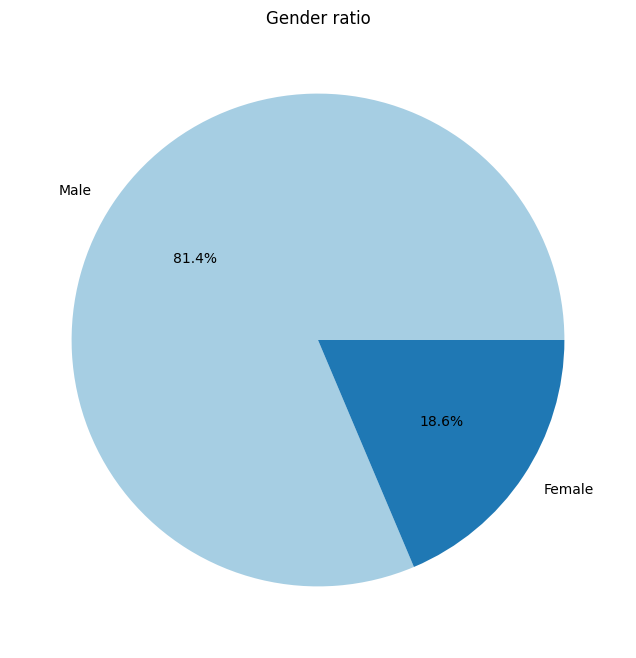

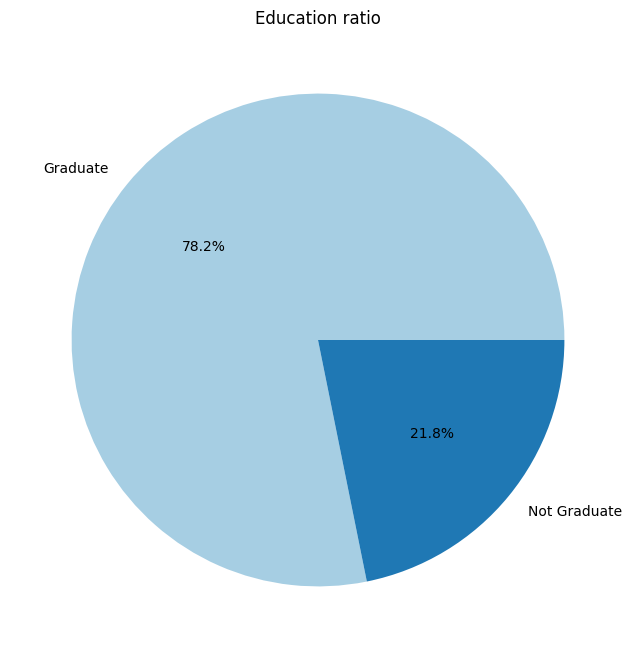

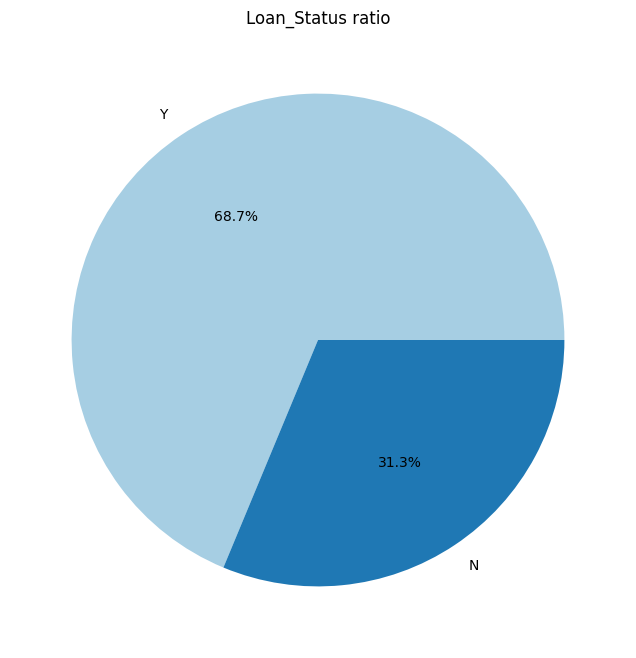

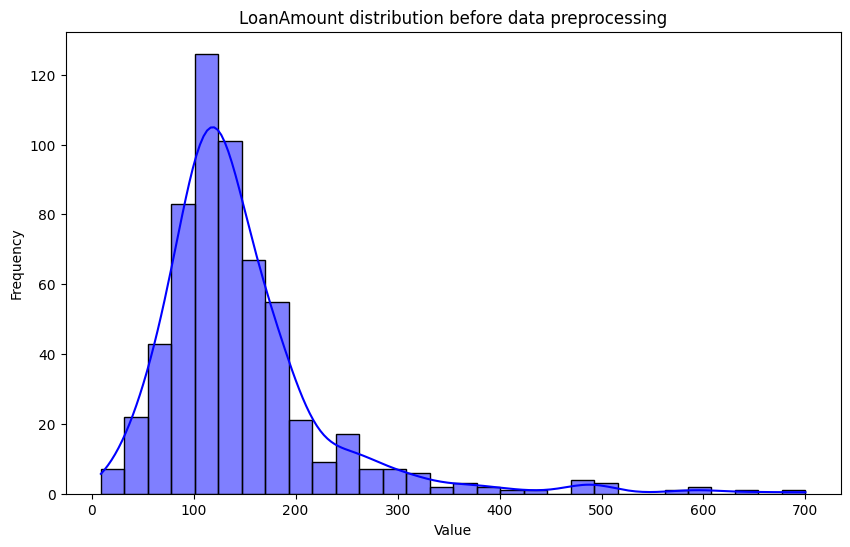

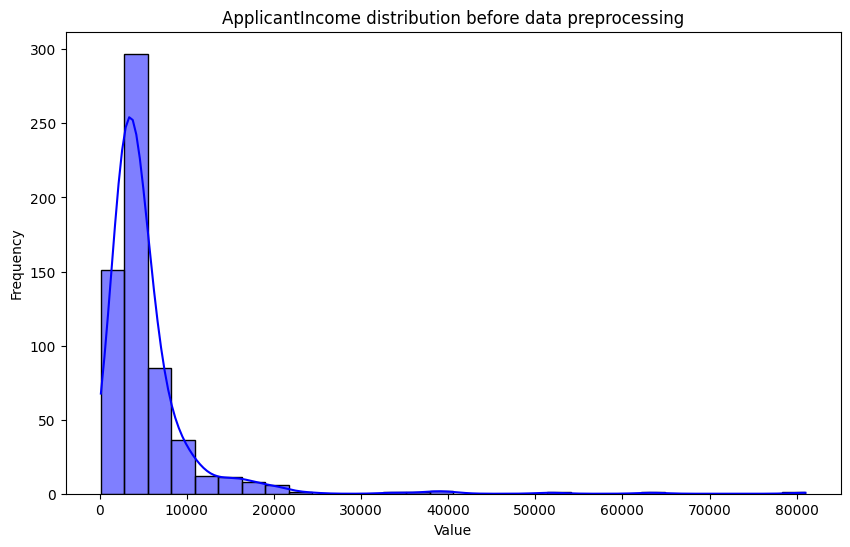

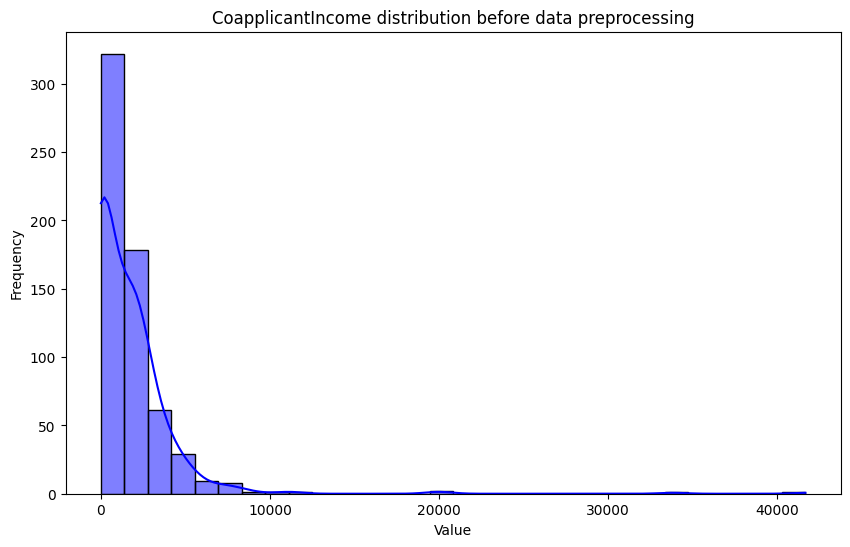

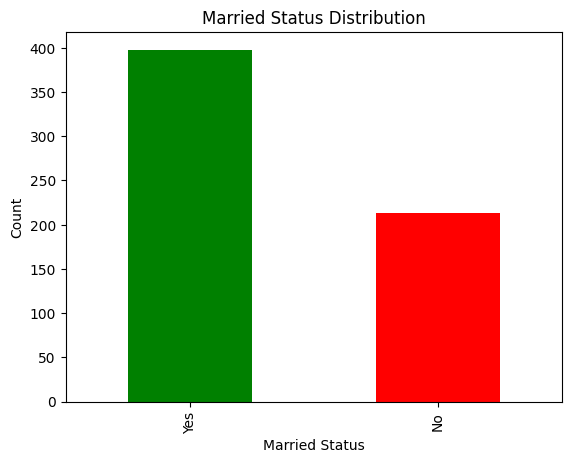

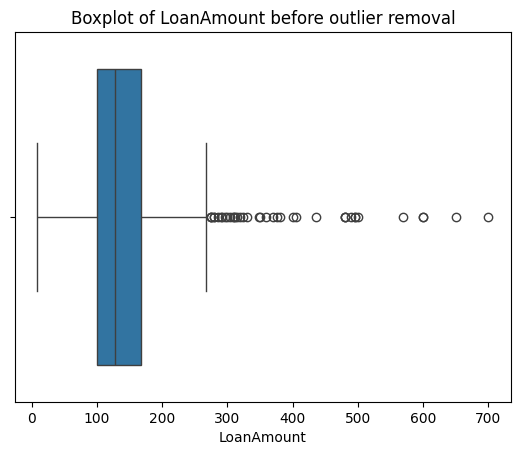

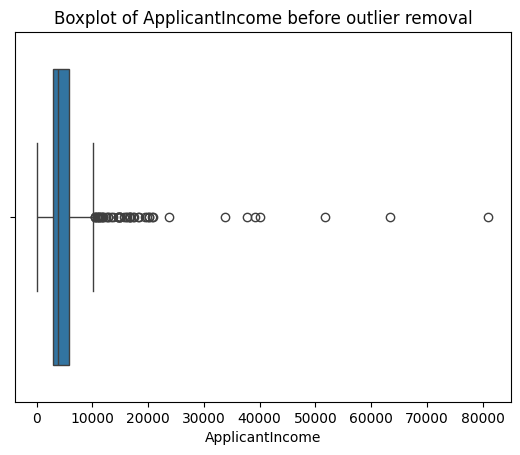

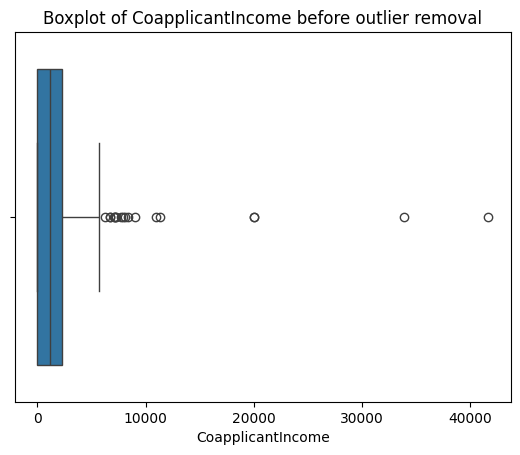

In [6]:
# Pie chart
for col in ['Gender', 'Education', 'Loan_Status']:
    counter = df[col].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counter, labels=counter.index, autopct='%.1f%%', colors=plt.cm.Paired(range(len(counter))))
    plt.title(f'{col} ratio')
    plt.show()


# Histogram
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'{col} distribution before data preprocessing')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Bar chart
## Married status
married_counts = df['Married'].value_counts()
married_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Married Status Distribution')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.show()


#Box plot for the following before handling outliers
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} before outlier removal')
    plt.show()

### Some observations
* Columns like : LoanAmount, ApplicantIncome and CoapplicantIncome are right skewed data
* Column like : Loan_Amount_Term is left skewed data
* The number of males applying for loans is significantly higher than that of females.
* 65% of the people applying for loans are married

## Data preprocessing

In [7]:
#Removing duplicated rows from the dataset
df = df.drop_duplicates()

### Missing data handling

In [8]:
# Displaying the number of missing values in each column 
display(df.isnull().sum())
print(f'The dataset contains {df.isnull().sum().sum()} null values')

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset contains 149 null values


In [9]:
# Handling the missing values
# Fill missing values in
# ['LoanAmount','ApplicantIncome', 'CoapplicantIncome'] values with median to reduce skewness
df['LoanAmount']  = df['LoanAmount'].fillna(df['LoanAmount'].median())

df['ApplicantIncome']  = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

df['CoapplicantIncome']  = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median())


# Fill missing values in
# ['Gender','Married', 'Self_Employed' , 'Loan_Amount_Term', 'Credit_History'] values with mode
df['Gender']  = df['Gender'].fillna(df['Gender'].mode().iloc[0])

df['Married']  = df['Married'].fillna(df['Married'].mode().iloc[0])

df['Self_Employed']  = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])

df['Loan_Amount_Term']  = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0])

df['Credit_History']  = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])


# Fill missing values in Dependents with zero
df['Dependents']  = df['Dependents'].fillna('0')

display(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers handling and detection

In [10]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
for col in ['LoanAmount', 'TotalIncome']:
    df = remove_outliers_iqr(df, col)
df = df.drop('TotalIncome', axis=1)

## Data visualization after data preprocessing

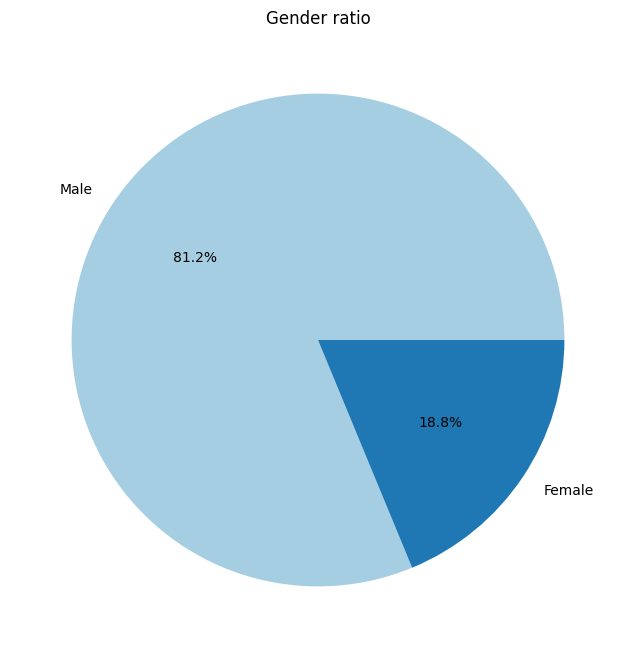

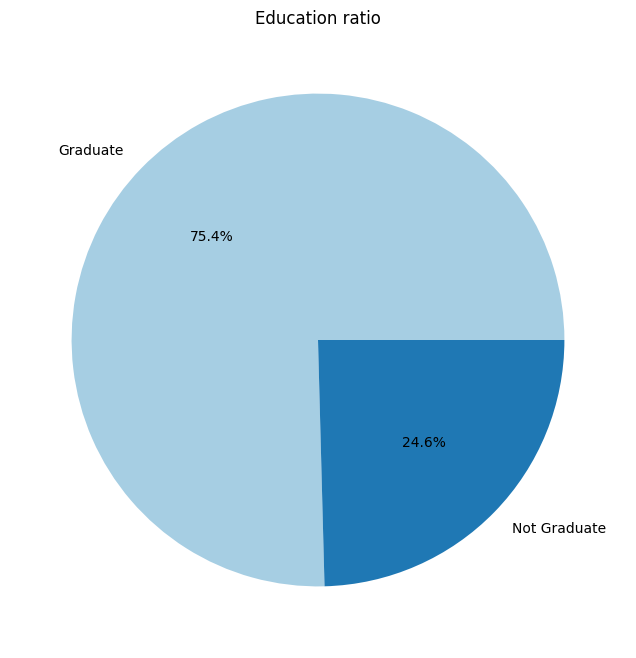

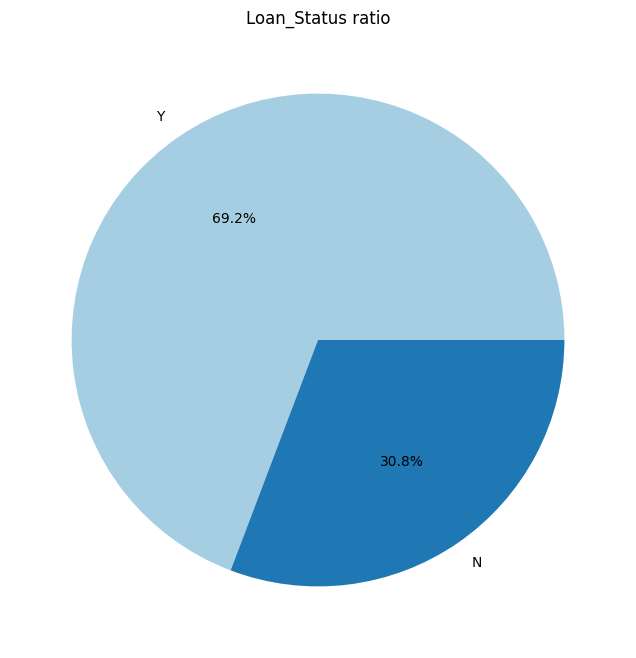

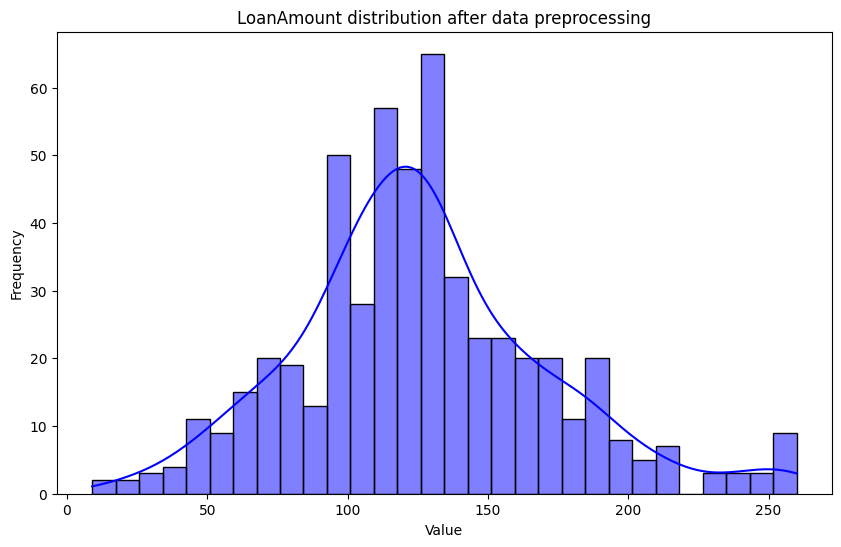

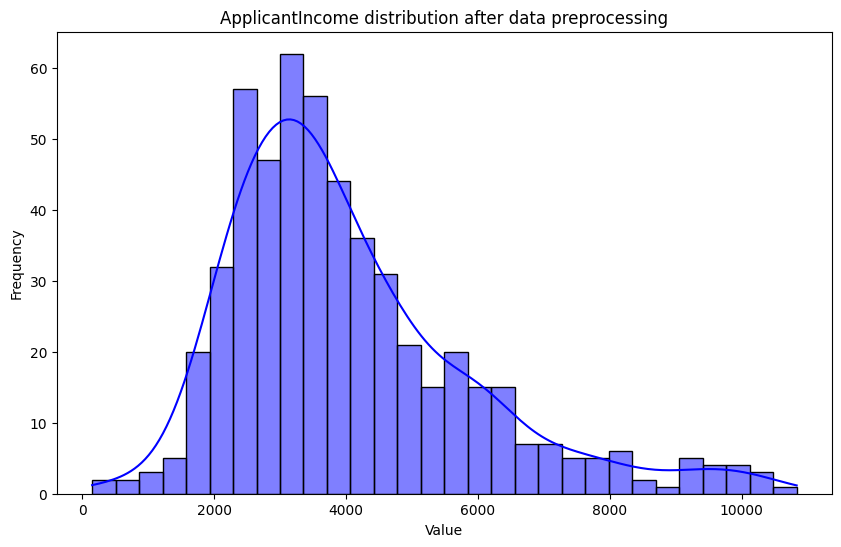

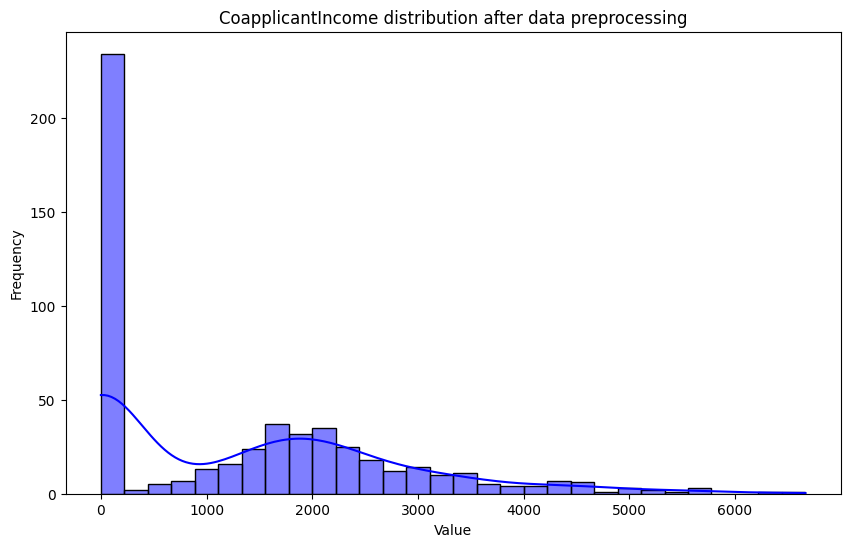

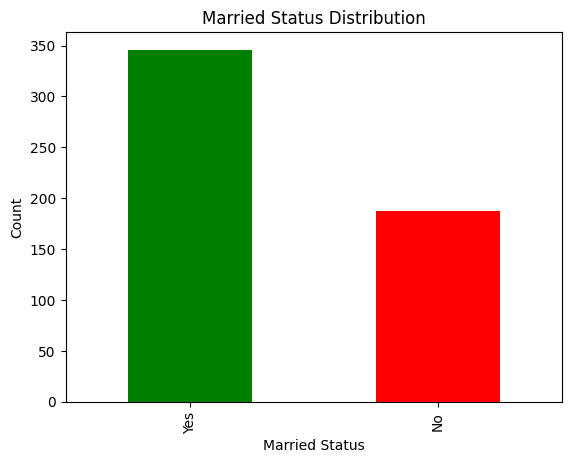

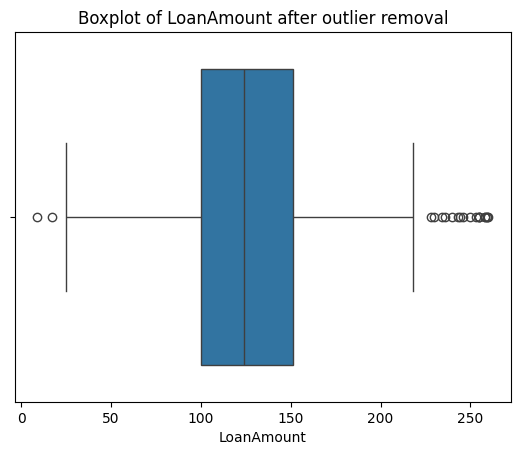

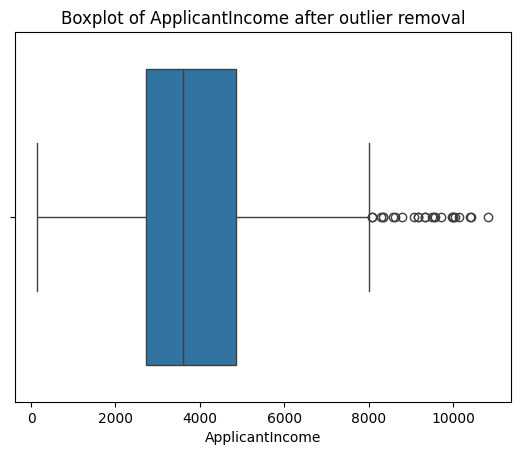

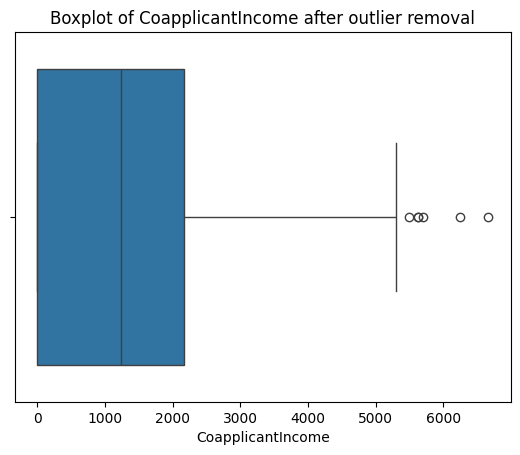

In [11]:
# Pie chart
for col in ['Gender', 'Education', 'Loan_Status']:
    counter = df[col].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counter, labels=counter.index, autopct='%.1f%%', colors=plt.cm.Paired(range(len(counter))))
    plt.title(f'{col} ratio')
    plt.show()


# Histogram
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'{col} distribution after data preprocessing')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Bar chart
## Married status
married_counts = df['Married'].value_counts()
married_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Married Status Distribution')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.show()


#Box plot for the following after handling outliers
for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

### Data encoding

In [12]:
# Apply label encoding and mapping to transform categorical variables into numerical values
label_encoder = LabelEncoder()

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})

df['Dependents'] = label_encoder.fit_transform(df['Dependents']).astype(int)

df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})

df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})

# Apply ordinal encoding to column 'Property_Area'
Areas = ['Rural', 'Semiurban', 'Urban']

df['Property_Area'] = df['Property_Area'].apply(lambda x: Areas.index(x))

df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            533 non-null    object 
 1   Gender             533 non-null    int64  
 2   Married            533 non-null    int64  
 3   Dependents         533 non-null    int64  
 4   Education          533 non-null    int64  
 5   Self_Employed      533 non-null    int64  
 6   ApplicantIncome    533 non-null    int64  
 7   CoapplicantIncome  533 non-null    float64
 8   LoanAmount         533 non-null    float64
 9   Loan_Amount_Term   533 non-null    float64
 10  Credit_History     533 non-null    float64
 11  Property_Area      533 non-null    int64  
 12  Loan_Status        533 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 58.3+ KB


## Correlation analaysis

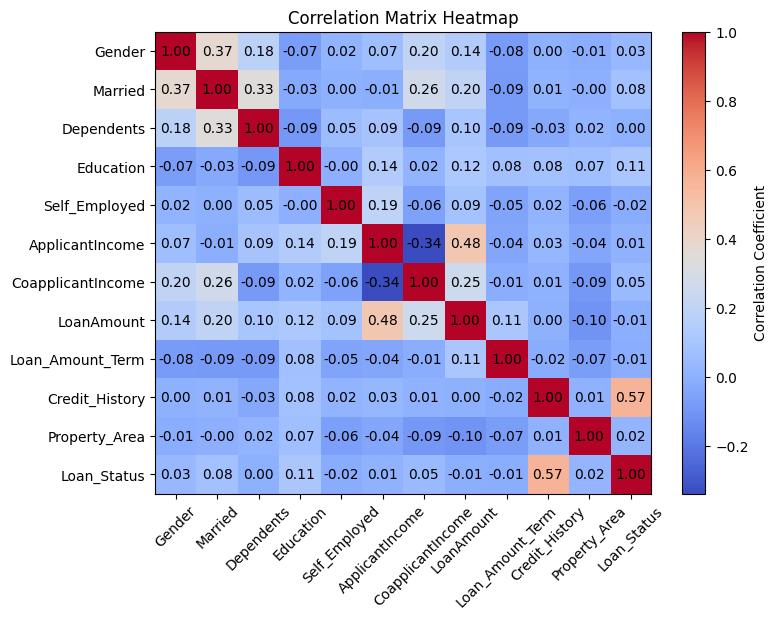

In [13]:
# Identifying correlations using Heatmap
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Convert correlation matrix to numpy array
data_array = correlation_matrix.values

# Heatmap using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(data_array, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlation Coefficient')

# Set ticks and labels
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)

# Add annotations
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{data_array[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix Heatmap')
plt.show()
# The most significant factor influencing loan approval is Credit_History.

## Data normalization

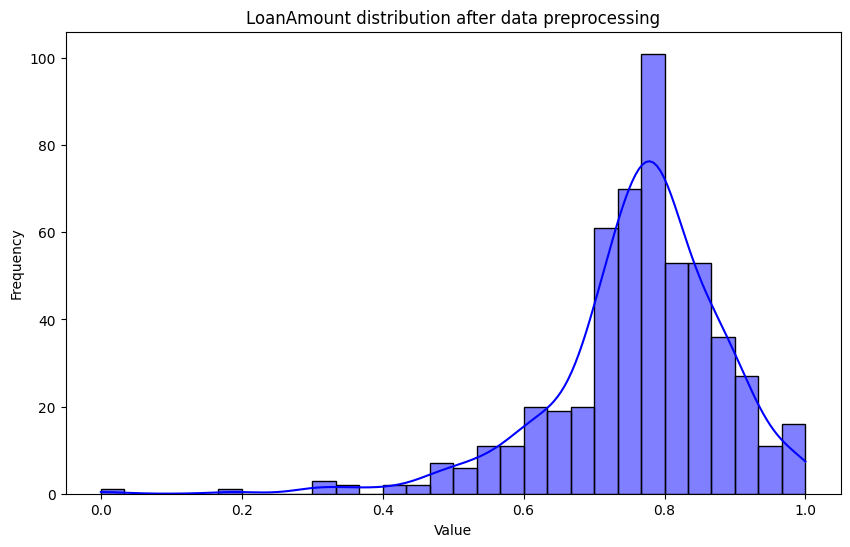

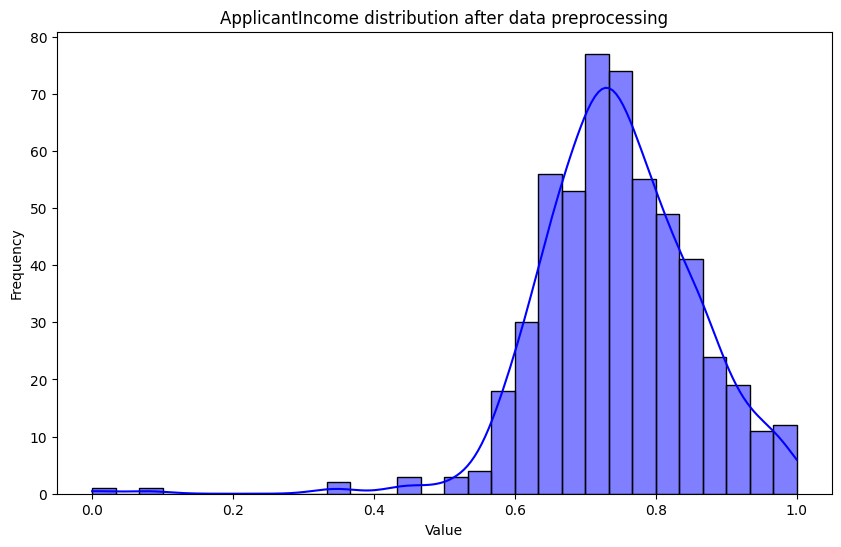

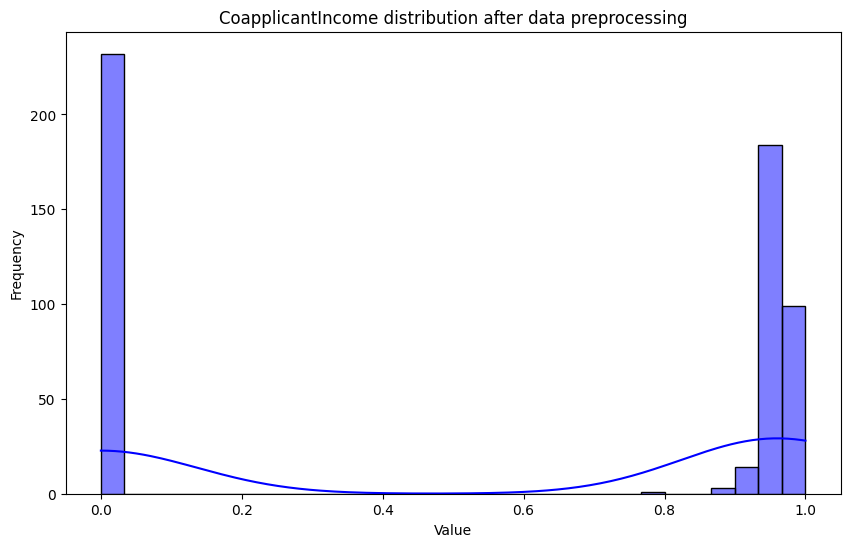

In [14]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro

# display(f"Before Normalization: {shapiro(df.drop("Loan_ID", axis=1))}")

def normalize(df, col):
    if df[col].eq(0).any():
        df[col] = np.log(df[col] + 1e-9)
    else:
        df[col] = np.log(df[col])
    df[col] = MinMaxScaler().fit_transform(df[col].values.reshape(-1, 1).astype(np.float64)).flatten()
    return df

for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    df = normalize(df, col)

for col in ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'{col} distribution after data preprocessing')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Model building

### Using logistic regression

In [15]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)

### Using random forest

In [17]:

rfc = RandomForestClassifier(random_state=36, max_depth=3)

Credit_History       0.505837
LoanAmount           0.112180
ApplicantIncome      0.111167
Property_Area        0.081401
CoapplicantIncome    0.063070
Loan_Amount_Term     0.050618
Education            0.028874
Dependents           0.018641
Married              0.013239
Self_Employed        0.008214
Gender               0.006759
dtype: float64

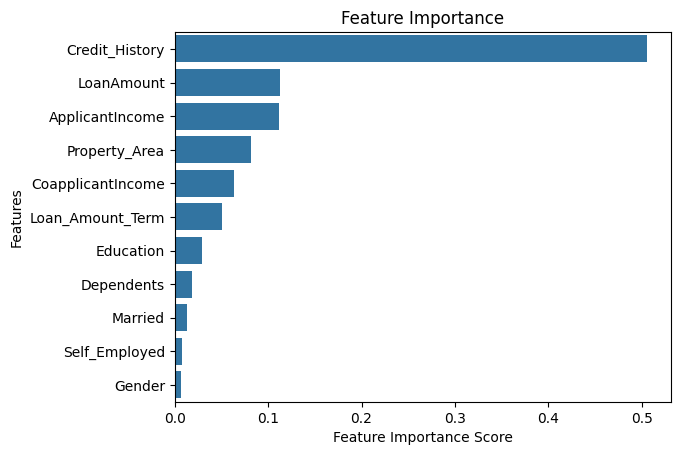

In [18]:
rfc.fit(X_train, y_train)

# Feature importance
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
display(feature_scores)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

In [19]:
y_pred = rfc.predict(X_test)

In [20]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8731


In [21]:
# # Deployment using flask

# app = Flask(__name__)

# @app.route('/', methods=['POST'])
# def index():
#     if request.method == 'POST':
#         df = None
#         if 'file' in request.files:
#             # print("file")
#             print(request.files)
#             file = request.files['file']
#             # print()
#             df = pd.read_csv(file)
#             # df = df.drop('Loan_Status', axis=1)
#         else:       
#             data = request.get_json()
#             df = pd.DataFrame(data)
#         df['LoanAmount']  = df['LoanAmount'].fillna(df['LoanAmount'].median())

#         df['ApplicantIncome']  = df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
        
#         df['CoapplicantIncome']  = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median())
        
        
#         # Fill missing values in
#         # ['Gender','Married', 'Self_Employed' , 'Loan_Amount_Term', 'Credit_History'] values with mode
#         df['Gender']  = df['Gender'].fillna(df['Gender'].mode().iloc[0])
        
#         df['Married']  = df['Married'].fillna(df['Married'].mode().iloc[0])
        
#         df['Self_Employed']  = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
        
#         df['Loan_Amount_Term']  = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0])
        
#         df['Credit_History']  = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])
        
        
#         # Fill missing values in Dependents with zero
#         df['Dependents']  = df['Dependents'].fillna('0')

#         df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#         for col in ['LoanAmount', 'TotalIncome']:
#             df = remove_outliers_iqr(df, col)
#         df = df.drop('TotalIncome', axis=1)

#         df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

#         df['Married'] = df['Married'].map({'No': 0, 'Yes': 1})
        
#         df['Dependents'] = label_encoder.fit_transform(df['Dependents']).astype(int)
        
#         df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
        
#         df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
        
#         # Apply ordinal encoding to column 'Property_Area'
#         Areas = ['Rural', 'Semiurban', 'Urban']
        
#         df['Property_Area'] = df['Property_Area'].apply(lambda x: Areas.index(x))
        
#         # df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
        
#         y_pred = classifier.predict(df.drop(['Loan_ID'], axis=1))
#         return jsonify(prediction=y_pred.tolist())

# def run_app():
#     app.run(host='0.0.0.0', port=5000, debug=False)

# thread = Thread(target=run_app)
# thread.start()


In [22]:
# http://127.0.0.1:5000/